In [1]:
import numpy as np

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Mute warnings - for the sake of presentation clarity
# Should be removed for real-life applications
# warnings.simplefilter('ignore')

# Beyond The Basics! Level Up Your Causal Discovery Skills in Python Now (2023)


The recent surge in interest in causality-related topics in Python has led to a wealth of resources, making it challenging to find the ones that are aligned with your learning goals.

As I began my adventure with causality some three years ago, I spent countless hours scouring the internet for valuable resources and robust libraries, determined to find the tools I needed to move on in my causal journey.

This blog is a part of the series where I share practical tips on learning and implementing causal models in Python.

If you're interested in modern causality, I've distilled over three years of hard-won knowledge and experience into an accessible guide that will help you master causality in a fraction of the time it would take to do all the research and coding yourself. 

Check my upcoming [causal book](https://causalpython.io) and be sure to join our growing community at [causalpython.io](https://causalpython.io) for even more tips, tricks, and support. See you there! :) 

Now, let's learn something new!

<a href="https://causalpython.io"><img src="img/CausalPython.io__flat.png" width=200 align="left"></a>
<br><br><br>


## LiNGAM - asymmetry

In [2]:
# Generate data
SAMPLE_SIZE = 1000

x_gauss = np.random.normal(0, 1, SAMPLE_SIZE)
y_gauss = x_gauss + 0.3 * np.random.normal(0, 1, SAMPLE_SIZE)

x_ngauss = np.random.uniform(0, 1, SAMPLE_SIZE)
y_ngauss = x_ngauss + 0.3 * np.random.uniform(0, 1, SAMPLE_SIZE)

In [3]:
# Fit regressions 
results = {}

for name, v in zip(['Gaussian', 'non-Gaussian'], [(x_gauss, y_gauss), (x_ngauss, y_ngauss)]):
    
    for direction in ['y ~ x', 'x ~ y']:   
        
        predictor_idx = 0
        target_idx = 1
        
        if direction.startswith('x'):
            predictor_idx, target_idx = target_idx, predictor_idx

        key = f'{name} | {direction}'
        print(key)
        
        # Fit the model
        lr = LinearRegression()
        lr.fit(v[predictor_idx].reshape(-1, 1), v[target_idx])
        
        # Predict
        preds = lr.predict(v[predictor_idx].reshape(-1, 1))
        
        # Compute residuals
        residuals = v[target_idx] - preds
        
        results[key] = preds, residuals

Gaussian | y ~ x
Gaussian | x ~ y
non-Gaussian | y ~ x
non-Gaussian | x ~ y


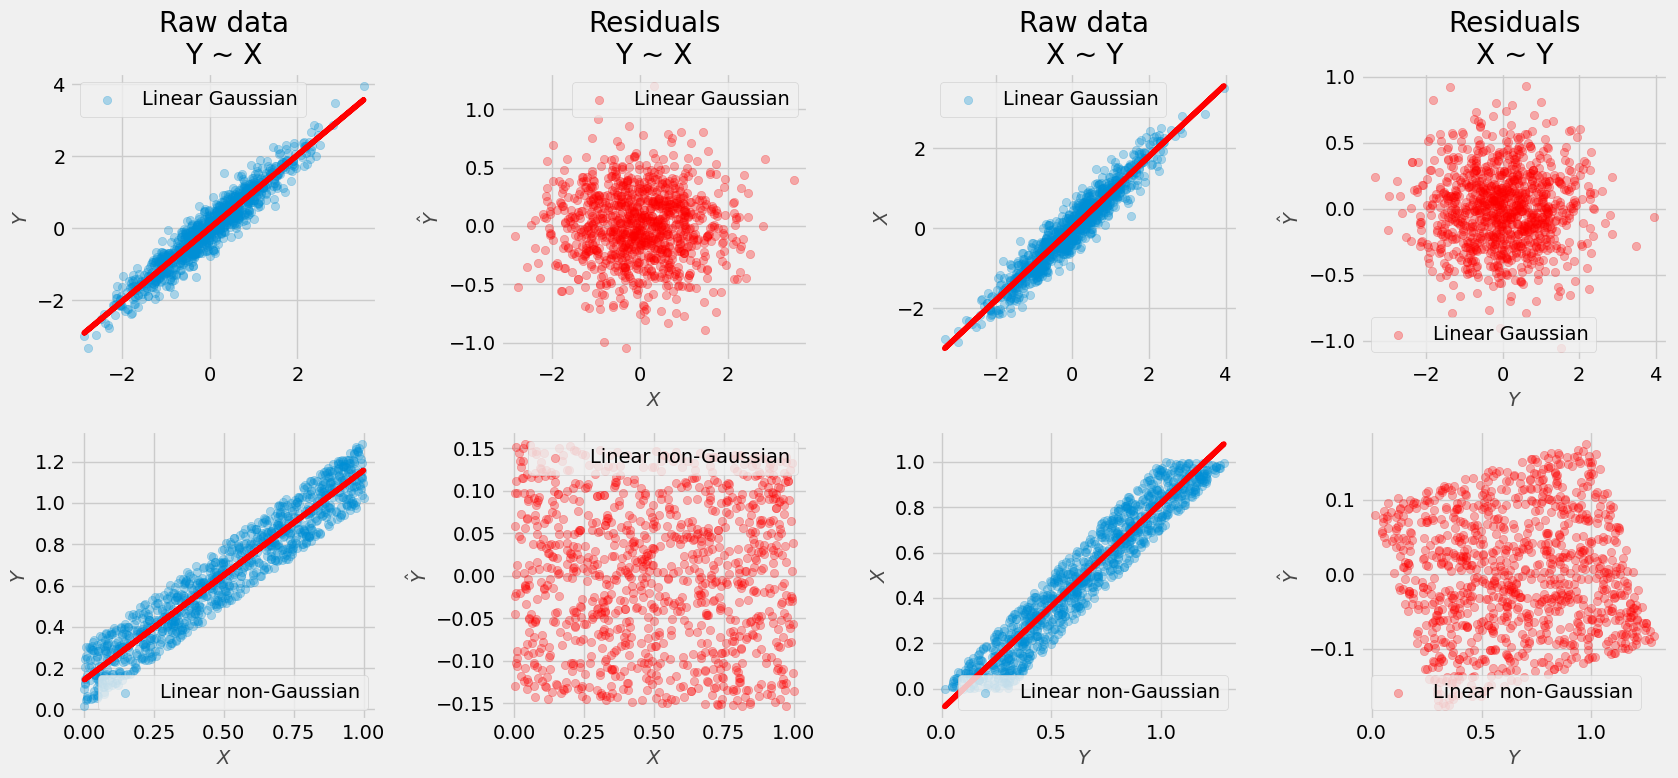

In [4]:
ALPHA = .3

# Plot the data
plt.figure(figsize=(17, 8))

# Plot X vs Y + regression lines
plt.subplot(241)
plt.scatter(x_gauss, y_gauss, label='Linear Gaussian', alpha=ALPHA)
plt.plot(x_gauss, results['Gaussian | y ~ x'][0], color='red')
plt.legend()
plt.ylabel('$Y$', alpha=.7, fontsize=14)
plt.title('Raw data\nY ~ X')

plt.subplot(245)
plt.scatter(x_ngauss, y_ngauss, label='Linear non-Gaussian', alpha=ALPHA)
plt.plot(x_ngauss, results['non-Gaussian | y ~ x'][0], color='red')
plt.xlabel('$X$', alpha=.7, fontsize=14)
plt.ylabel('$Y$', alpha=.7, fontsize=14)
plt.legend()


# Plot residuals Y ~ X
plt.subplot(242)
plt.scatter(x_gauss, results['Gaussian | y ~ x'][1], label='Linear Gaussian', color='red', alpha=ALPHA)
plt.legend()
plt.ylabel('$\hat{Y}$', alpha=.7, fontsize=14)
plt.xlabel('$X$', alpha=.7, fontsize=14)
plt.title('Residuals\nY ~ X')

plt.subplot(246)
plt.scatter(x_ngauss, results['non-Gaussian | y ~ x'][1], label='Linear non-Gaussian', color='red', alpha=ALPHA)
plt.legend()
plt.ylabel('$\hat{Y}$', alpha=.7, fontsize=14)
plt.xlabel('$X$', alpha=.7, fontsize=14)


# Plot Y vs X + regression lines
plt.subplot(243)
plt.scatter(y_gauss, x_gauss, label='Linear Gaussian', alpha=ALPHA)
plt.plot(y_gauss, results['Gaussian | x ~ y'][0], color='red')
plt.legend()
plt.ylabel('$X$', alpha=.7, fontsize=14)
plt.title('Raw data\nX ~ Y')

plt.subplot(247)
plt.scatter(y_ngauss, x_ngauss, label='Linear non-Gaussian', alpha=ALPHA)
plt.plot(y_ngauss, results['non-Gaussian | x ~ y'][0], color='red')
plt.xlabel('$Y$', alpha=.7, fontsize=14)
plt.ylabel('$X$', alpha=.7, fontsize=14)
plt.legend()


# Plot residuals X ~ Y
plt.subplot(244)
plt.scatter(y_gauss, results['Gaussian | x ~ y'][1], label='Linear Gaussian', color='red', alpha=ALPHA)
plt.legend()
plt.xlabel('$Y$', alpha=.7, fontsize=14)
plt.ylabel('$\hat{Y}$', alpha=.7, fontsize=14)
plt.title('Residuals\nX ~ Y')

plt.subplot(248)
plt.scatter(y_ngauss, results['non-Gaussian | x ~ y'][1], label='Linear non-Gaussian', color='red', alpha=ALPHA)
plt.legend()
plt.xlabel('$Y$', alpha=.7, fontsize=14)
plt.ylabel('$\hat{Y}$', alpha=.7, fontsize=14)

plt.tight_layout()
plt.show()